In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
data = pd.read_csv('../datasets/data/train_explore.csv')
data.head(10)

,Unnamed: 0,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,74474,3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,89073,4,...,NaN,NaN,NaN,NaN,0.0,0.0,5.0,0,NaN,0
3,3,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11622,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,4,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,75491,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
5,5,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,109185,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
6,6,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,137826,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
7,7,6,2013-06-05 12:27:51,14,100,NaN,NaN,100,10759,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
8,8,6,2013-06-05 12:27:51,14,100,NaN,NaN,100,52376,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
9,9,6,2013-06-05 12:27:51,14,100,NaN,NaN,100,118866,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [3]:
data.columns.unique()

Index([u'Unnamed: 0', u'srch_id', u'date_time', u'site_id',
       u'visitor_location_country_id', u'visitor_hist_starrating',
       u'visitor_hist_adr_usd', u'prop_country_id', u'prop_id',
       u'prop_starrating', u'prop_review_score', u'prop_brand_bool',
       u'prop_location_score1', u'prop_location_score2',
       u'prop_log_historical_price', u'position', u'price_usd',
       u'promotion_flag', u'srch_destination_id', u'srch_length_of_stay',
       u'srch_booking_window', u'srch_adults_count', u'srch_children_count',
       u'srch_room_count', u'srch_saturday_night_bool',
       u'srch_query_affinity_score', u'orig_destination_distance',
       u'random_bool', u'comp1_rate', u'comp1_inv', u'comp1_rate_percent_diff',
       u'comp2_rate', u'comp2_inv', u'comp2_rate_percent_diff', u'comp3_rate',
       u'comp3_inv', u'comp3_rate_percent_diff', u'comp4_rate', u'comp4_inv',
       u'comp4_rate_percent_diff', u'comp5_rate', u'comp5_inv',
       u'comp5_rate_percent_diff', u'comp6_r

In [8]:
def num_missing(x):
    return sum(x.isnull())

In [6]:
# Find if any row has missing value
data.apply(num_missing, axis=1)

0         21
1         21
2         21
3         29
4         28
5         28
6         28
7         28
8         29
9         29
10        21
11        21
12        20
13        20
14        20
15        29
16        28
17        29
18        24
19        28
20        26
21        26
22        27
23        22
24        22
25        20
26        20
27        22
28        22
29        24
          ..
991722    22
991723    23
991724    24
991725    29
991726    24
991727    29
991728    24
991729    28
991730    28
991731    28
991732    28
991733    29
991734    30
991735    19
991736    20
991737    21
991738    20
991739    19
991740    23
991741    22
991742    23
991743    17
991744    22
991745    20
991746    28
991747    22
991748    19
991749    29
991750    20
991751    18
Length: 991752, dtype: int64

In [11]:
# Find which columns has how much missing vlaue 

data.apply(num_missing, axis=0)

srch_id                        0
site_id                        0
visitor_location_country_id    0
prop_country_id                0
prop_id                        0
prop_starrating                0
prop_brand_bool                0
prop_location_score1           0
prop_log_historical_price      0
position                       0
price_usd                      0
promotion_flag                 0
srch_destination_id            0
srch_length_of_stay            0
srch_booking_window            0
srch_adults_count              0
srch_children_count            0
srch_room_count                0
srch_saturday_night_bool       0
random_bool                    0
booking_bool                   0
dtype: int64

In [8]:
data.shape

(991752, 55)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991752 entries, 0 to 991751
Data columns (total 19 columns):
srch_id                        991752 non-null int64
site_id                        991752 non-null int64
visitor_location_country_id    991752 non-null int64
prop_country_id                991752 non-null int64
prop_id                        991752 non-null int64
prop_starrating                991752 non-null int64
prop_brand_bool                991752 non-null int64
prop_location_score1           991752 non-null float64
prop_log_historical_price      991752 non-null float64
price_usd                      991752 non-null float64
promotion_flag                 991752 non-null int64
srch_destination_id            991752 non-null int64
srch_length_of_stay            991752 non-null int64
srch_booking_window            991752 non-null int64
srch_adults_count              991752 non-null int64
srch_children_count            991752 non-null int64
srch_room_count                9917

In [26]:
data.drop(['position', 'booking_bool'], axis=1, inplace=True)

In [18]:
data.describe()

,Unnamed: 0,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
count,662336.000000,662336.000000,662336.000000,662336.000000,33637.000000,33824.000000,662336.000000,662336.00000,662336.000000,661388.000000,...,112627.000000,32377.000000,35203.000000,13143.000000,42653.000000,48051.000000,18909.000000,254659.000000,264068.000000,81567.000000
mean,331167.500000,333153.343986,9.954343,175.336541,3.354464,174.797830,173.793566,70033.97650,3.182136,3.782473,...,24.744599,0.134416,0.077493,17.108727,0.150869,0.082496,19.966577,-0.060249,0.010293,22.160482
std,191200.078285,192178.478006,7.647157,65.843001,0.691506,106.747157,68.456242,40642.18782,1.048269,1.044966,...,832.203179,0.566087,0.304717,28.899736,0.581615,0.312720,48.016657,0.469275,0.202926,810.761592
min,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000
25%,165583.750000,166443.750000,5.000000,100.000000,2.900000,109.595000,100.000000,34966.00000,3.000000,3.500000,...,7.000000,0.000000,0.000000,6.000000,0.000000,0.000000,7.000000,0.000000,0.000000,7.000000
50%,331167.500000,333844.000000,5.000000,219.000000,3.400000,150.930000,219.000000,69512.00000,3.000000,4.000000,...,12.000000,0.000000,0.000000,11.000000,0.000000,0.000000,12.000000,0.000000,0.000000,11.000000
75%,496751.250000,499285.000000,14.000000,219.000000,3.910000,212.040000,219.000000,105183.00000,4.000000,4.500000,...,21.000000,0.000000,0.000000,18.000000,1.000000,0.000000,20.000000,0.000000,0.000000,17.000000
max,662335.000000,665571.000000,34.000000,231.000000,5.000000,1654.920000,230.000000,140821.00000,5.000000,5.000000,...,119400.000000,1.000000,1.000000,998.000000,1.000000,1.000000,1597.000000,1.000000,1.000000,149400.000000


In [4]:
data.drop(['Unnamed: 0', 'comp1_rate', 'comp1_inv','comp1_rate_percent_diff', 
          'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff',
          'comp3_rate', 'comp4_rate', 'comp5_rate', 'comp6_rate', 'comp7_rate', 'comp8_rate',
          'comp3_inv','comp4_inv', 'comp5_inv', 'comp6_inv', 'comp7_inv', 'comp8_inv',
          'comp3_rate_percent_diff', 'comp4_rate_percent_diff', 'comp5_rate_percent_diff',
           'comp6_rate_percent_diff', 'comp7_rate_percent_diff', 'comp8_rate_percent_diff'], axis=1, inplace=True)

In [5]:
y = data['click_bool']
data.drop(['click_bool'], axis=1, inplace=True)

In [6]:
data.drop(['date_time'], axis=1, inplace=True)

In [10]:
data.drop(['visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_review_score', 'prop_location_score2',
          'srch_query_affinity_score', 'orig_destination_distance', 'gross_bookings_usd'], axis=1, inplace=True)

In [31]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(data, y, test_size=.2, random_state=42)

In [4]:
price = np.array(data['price_usd'])
print('Mean price: ', price.mean())
print('Minimum price: ', price.min())
print('Maximum price: ', price.max())
print('Standard deviation: ', price.std())

('Mean price: ', 227.98688687292784)
('Minimum price: ', 0.0)
('Maximum price: ', 5097647.93)
('Standard deviation: ', 10649.132521922766)


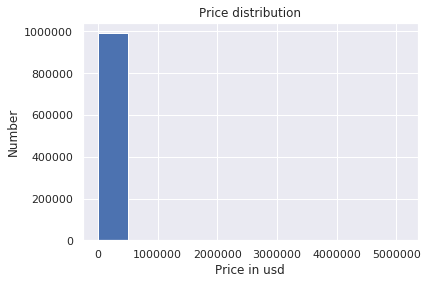

In [10]:
sns.set()
plt.hist(price)
plt.xlabel('Price in usd')
plt.ylabel('Number')
plt.title('Price distribution');


In [12]:
np.count_nonzero(price>10000)

363

In [13]:
np.count_nonzero(price>100000)

149

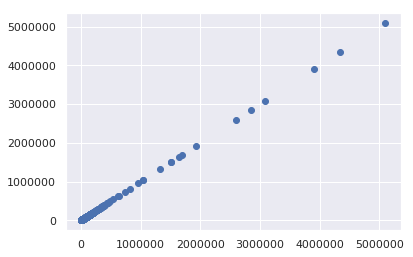

In [20]:
plt.scatter(price, price)

In [22]:
print('price > 5000000', np.count_nonzero(price>5000000))
print('price > 3000000', np.count_nonzero(price>3000000))
print('price > 1000000', np.count_nonzero(price>1000000))

('price > 5000000', 1)
('price > 3000000', 4)
('price > 1000000', 14)


In [46]:
saturday_night = data.groupby('srch_saturday_night_bool')
saturday_night_price = np.array(saturday_night.get_group(0)['price_usd'])
print('Mean saturday night price: ',saturday_night_price.mean())
print('Max saturday night price: ',saturday_night_price.max())
print('Min saturday night price: ',saturday_night_price.min())
print('Total :', saturday_night_price.size)

('Mean saturday night price: ', 257.5277427264307)
('Max saturday night price: ', 5097647.93)
('Min saturday night price: ', 0.0)
('Total :', 495527)


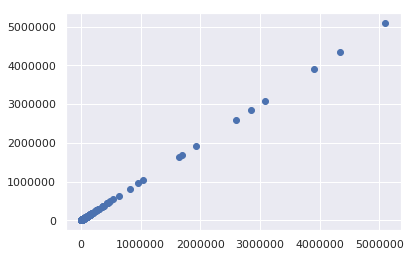

In [44]:
plt.scatter(saturday_night_price, saturday_night_price)

In [ ]:
pivot_data = data.loc[:,["price_usd", "srch_saturday_night_bool", "prop_location_score1", 
                  "prop_log_historical_price",  "srch_booking_window", "srch_adults_count", 
                  "srch_children_count",  "srch_room_count","orig_destination_distance"]]
ax = sns.heatmap(pivot_data, annot=True, fmt="d")
pivot_data.head()

In [28]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_depth': [3, 10, None]}
decision_tree = DecisionTreeClassifier(criterion='gini', min_samples_split=30)

In [32]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(decision_tree, parameters, cv=3, scoring='roc_auc')
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)

{'max_depth': 10}


In [34]:
from sklearn.metrics import roc_auc_score

decision_tree_best = grid_search.best_estimator_
pos_prob = decision_tree_best.predict_proba(x_test)
# print('The roc on testing set is: ', roc_auc_score(y_test, pos_prob))

In [35]:
pos_prob.shape

(198351, 2)

In [37]:
pos_prob

array([[0.95335295, 0.04664705],
       [0.93422285, 0.06577715],
       [0.97809917, 0.02190083],
       ...,
       [0.95335295, 0.04664705],
       [0.94905545, 0.05094455],
       [0.93422285, 0.06577715]])

In [39]:
pos_prob[:, 1]

array([0.04664705, 0.06577715, 0.02190083, ..., 0.04664705, 0.05094455,
       0.06577715])

In [38]:
y_test.shape

(198351,)

In [40]:
print('The roc on testing set is: ', roc_auc_score(y_test, pos_prob[:, 1]))

('The roc on testing set is: ', 0.597316590617287)
